Loading the dataset and the necessary libraries:

In [22]:
library(tidyverse)
library(tidymodels)

In [23]:
data <- read_csv2("Absenteeism_at_work.csv")
colnames(data) <- make.names(colnames(data))


data_selected <- select(data,Reason.for.absence,Absenteeism.time.in.hours,Body.mass.index) |>
        mutate(across(Reason.for.absence, as.factor)) 

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 740 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (20): ID, Reason for absence, Month of absence, Day of the week, Seasons...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Data Table showing number of observations in each Reason of Absence:

In [24]:
data_table <- data_selected |>
    group_by(Reason.for.absence)|>
    summarize(n=n()) |>
    arrange(desc(n)) |>
    slice(1:10)
data_table

data <- filter(data, Reason.for.absence %in% c("23","28","27","13","0","19","22","26","25","11"))

Reason.for.absence,n
<fct>,<int>
23,149
28,112
27,69
13,55
0,43
19,40
22,38
26,33
25,31


Data plot for Absentee Time:

ID,Reason.for.absence,Absenteeism.time.in.hours
<int>,<fct>,<dbl>
1,0,0.000000
2,27,2.275362
3,23,2.845638
4,28,2.991071
5,25,3.483871
6,26,7.272727
7,22,7.710526
8,11,11.423077
9,13,15.309091


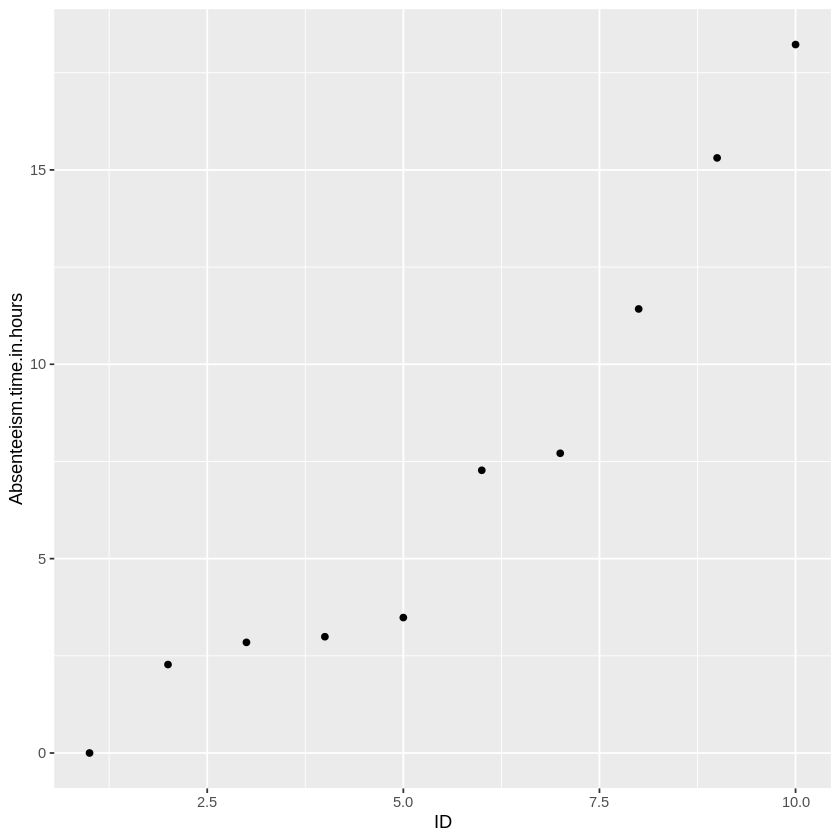

In [25]:
data_mean_time <- select(data,Reason.for.absence,Absenteeism.time.in.hours,Body.mass.index) |>
        mutate(across(Reason.for.absence, as.factor))  |>
    group_by(Reason.for.absence)|>
    summarize(Absenteeism.time.in.hours = mean(Absenteeism.time.in.hours))|>
    arrange(Absenteeism.time.in.hours) |>
    tibble::rowid_to_column("ID")
data_mean_time

data_plot_time <- ggplot(data_mean_time, aes(x=ID,y=Absenteeism.time.in.hours)) +
    geom_point()
data_plot_time

Data plot for BMI:

ID,Reason.for.absence,Body.mass.index
<int>,<fct>,<dbl>
1,25,25.09677
2,22,26.18421
3,19,26.40000
4,11,26.42308
5,28,26.53571
6,13,26.63636
7,23,26.65772
8,27,27.46377
9,0,28.32558


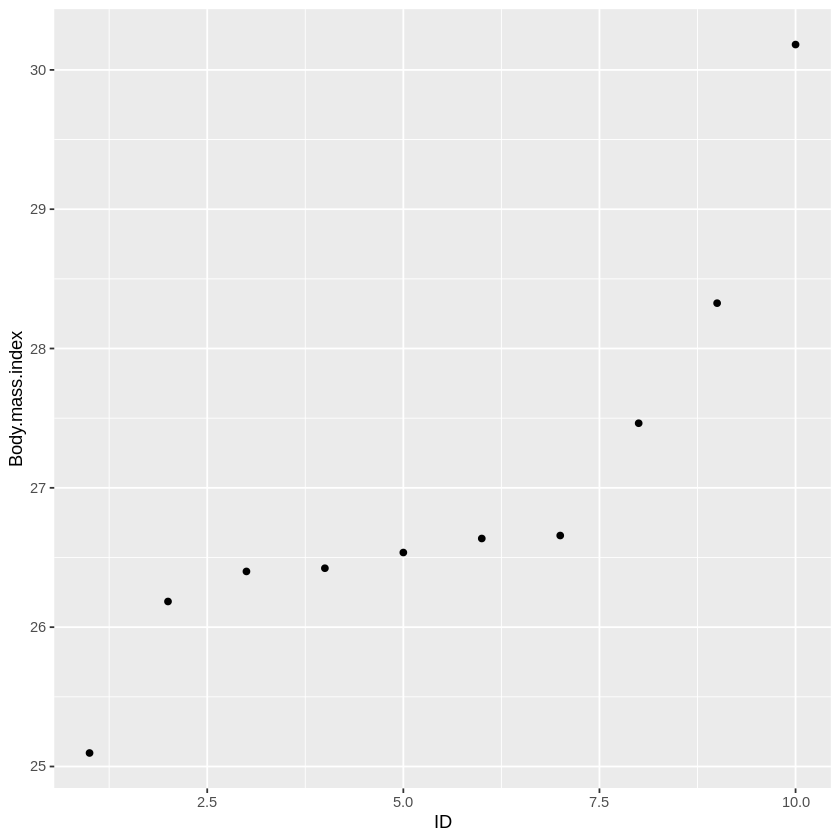

In [26]:
data_mean_BMI <- select(data,Reason.for.absence,Absenteeism.time.in.hours,Body.mass.index) |>
        mutate(across(Reason.for.absence, as.factor))  |>
    group_by(Reason.for.absence)|>
    summarize(Body.mass.index = mean(Body.mass.index)) |>
    arrange(Body.mass.index) |>
    tibble::rowid_to_column("ID")
data_mean_BMI 

data_plot_BMI <- ggplot(data_mean_BMI, aes(x=ID,y=Body.mass.index)) +
    geom_point()
data_plot_BMI

Data plot for Age:

ID,Reason.for.absence,Age
<int>,<fct>,<dbl>
1,22,32.65789
2,11,35.11538
3,19,35.45000
4,27,35.50725
5,23,35.61074
6,25,36.16129
7,13,36.49091
8,28,37.50893
9,26,37.84848


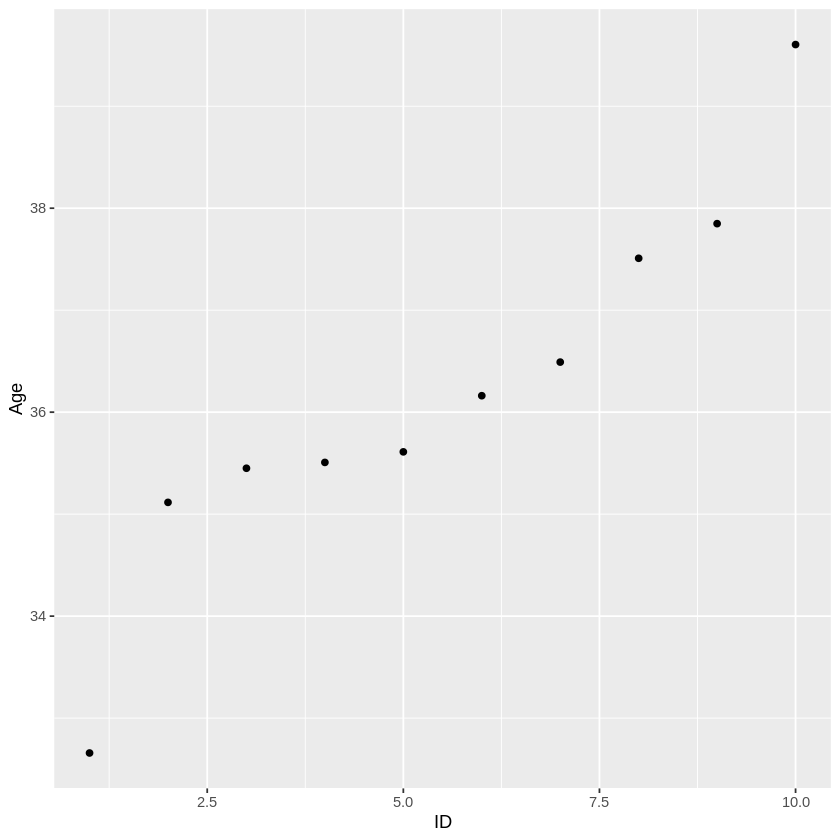

In [27]:
data_mean_Age <- select(data,Reason.for.absence,Absenteeism.time.in.hours,Body.mass.index,Age) |>
        mutate(across(Reason.for.absence, as.factor))  |>
    group_by(Reason.for.absence)|>
    summarize(Age = mean(Age)) |>
    arrange(Age) |>
    tibble::rowid_to_column("ID")
data_mean_Age

data_plot_Age <- ggplot(data_mean_Age, aes(x=ID,y=Age)) +
    geom_point()
data_plot_Age 

Splitting the data:

In [28]:
data_split <- initial_split(data_selected, prop = 0.75, strata = Reason.for.absence)  
data_train <- training(data_split)   
data_test <- testing(data_split)